<a href="https://colab.research.google.com/github/carolina-garay/M_Espacios_Verdes_2022_Grupo1/blob/Seba-Ormaechea/P1_EspVerdes_Grupo1_SGO_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Espacios Verdes. Práctico de análisis y visualización
Grupo 1: 
- Artola, María Fernanda
- Garay, Carolina
- Nievas, Rafael
- Ormaechea, Sebastián

## Introducción
El monitoreo de espacios verdes mediante sensores remotos (satélites), puede ser una alternativa interesante para aquellos municipios que busquen preservar el buen estado de estos espacios, reduciendo la necesidad de personal especializado para el control in situ. Sería interesante que este monitoreo implique la sistematización de tareas de control y brinde indicadores efectivos para advertir estados de deterioro que requieran ser atendidos. Se espera que el análisis de datos provistos con imágenes satelitales e indicadores como NVDI (Indice Diferencial de Vegetación Normalizado), permita detectar cambios en la condición de la vegetación a través de las estaciones del año y eventualmente detectar cambios anormales que representen estados preliminares de degradación de estos espacios. 
Por otro lado, es posible que la resolución de las imagenes no permita detectar cambios a nivel de arboles individuales o que, en casos de vegetación multiestratificada, no se puedan advertir los cambios en cado estrato. 

## Presentación del Dataset
El dataset disponible se encuentra en formato tabular y cuenta con 208932 registros (filas) que representan diferentes espacios verdes (plazas. parques, etc.) de la ciudad de Córdoba, tomados en diferentes fechas desde el año 2017 al 2022. La obtención de diferentes fechas para una misma zona es lo que permite luego un análisis de evolución temporal de la vegetación. 

El dataset también cuenta con 167 columnas que caracterizan cada uno de los  registros mediante los siguientes estadísticos o propiedades: 
- {B0i/indice}_{min,max,mean,median,nodata,range,count}:
 - min: valor mínimo alcanzado por la Banda o indice en la zona de interés.
 - max: valor máximo alcanzado por la Banda o indice en la zona de interés.
 - median: mediana alcanzada por la Banda o indice en la zona de interés.
 - nodata: cantidad de valores nulos en la Banda o indice en la zona de interés.
 - range: rango de los valores alcanzado por la Banda o indice en la zona de interés.
 - count: cantidad de valores en la zona de interés (count + nodata son la cantidad total de pixeles de un dado espacio verde)
- raster: raster del cual se extraen los estadísticos
- clouds_on_raster: nubosidad del raster completo
- osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
- name: nombre del espacio ( si es que lo tiene, por ejemplo, Parque Sarmiento).
- area_m2: area en metros cuadrados
- date: fecha de la muestra. 

Los estadísticos fueron calculados en base a rasters. En forma simplificada un raster es una grilla de puntos, cada uno de los cuales tiene alguna clase de identificación geográfica, que permite ubicarlos en el espacio. Además, cada una de esas grillas de puntos se corresponde a una "banda". Se hace referencia a banda porque esta asociada a un rango (espectral) en el cual el elemento sensor es capaz de "ver" o "capturar" datos. Cada punto de la grilla tiene un valor que se corresponde con lo medido por el instrumento específico en el satélite. 

Los rasters fueron obtenidos a partir de imágenes satelitales del [Proyecto Copernicus](https://www.copernicus.eu/es/sobre-copernicus/infraestructura) y uno de sus satélites Sentinel (Sentinel 2), con una resolución de entre 2 a 10 metros. Para la descarga de estas imágenes primero se definió la zona general de interés y también ciertas características o features específicas para abordar el problema de interés. En el caso del presente dataset, la zona de interés es la Ciudad de Córdoba, la cual es enteramente captada por una pisada del satelite denominada Tile 20JLL. 
 

Dudas sobre la sección "Presentación del dataset": 
- No comprendo a qué se refiere con hacer algo vistoso o demostrativo en la sección "Presentación del dataset".
- Si un registro tiene valores para diferentes bandas, es porque proviene de varios rasters. Si esto es así, ¿porqué hay una columna llamada "raster" que hace referencia a un nombre de un solo raster?

In [ ]:
# Setup necesario para correr pandas profiling
!pip install pandas_profiling==2.8.0
!pip install pandas==1.2.0

In [17]:
# Importación necesaria para correr pandas profiling y descargar reporte
from pandas_profiling import ProfileReport
from google.colab import files

In [ ]:
# Descarga de base de datos
# from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

In [3]:
import pandas as pd

In [4]:
# Lectura de csv y obtención de dataframe 
df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)

In [6]:
# Exploración del dataset. Usamos "display" en lugar de "print" porque ofrece una mejor visualización de la tabla
display(df_.head())

Dataframe HEAD


,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03


In [20]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208932 entries, 0 to 208931
Columns: 167 entries, B02_min to date
dtypes: float64(140), int64(24), object(3)
memory usage: 267.8+ MB


In [10]:
# Imprimimos todas las variables para verificar sus nombres
print(df_.columns.tolist())

['B02_min', 'B02_max', 'B02_mean', 'B02_median', 'B02_nodata', 'B02_range', 'B02_count', 'B03_min', 'B03_max', 'B03_mean', 'B03_median', 'B03_nodata', 'B03_range', 'B03_count', 'B04_min', 'B04_max', 'B04_mean', 'B04_median', 'B04_nodata', 'B04_range', 'B04_count', 'B05_min', 'B05_max', 'B05_mean', 'B05_median', 'B05_nodata', 'B05_range', 'B05_count', 'B06_min', 'B06_max', 'B06_mean', 'B06_median', 'B06_nodata', 'B06_range', 'B06_count', 'B07_min', 'B07_max', 'B07_mean', 'B07_median', 'B07_nodata', 'B07_range', 'B07_count', 'B8A_min', 'B8A_max', 'B8A_mean', 'B8A_median', 'B8A_nodata', 'B8A_range', 'B8A_count', 'B08_min', 'B08_max', 'B08_mean', 'B08_median', 'B08_nodata', 'B08_range', 'B08_count', 'B11_min', 'B11_max', 'B11_mean', 'B11_median', 'B11_nodata', 'B11_range', 'B11_count', 'B12_min', 'B12_max', 'B12_mean', 'B12_median', 'B12_nodata', 'B12_range', 'B12_count', 'ndvi_min', 'ndvi_max', 'ndvi_mean', 'ndvi_median', 'ndvi_nodata', 'ndvi_range', 'ndvi_count', 'ndwi_min', 'ndwi_max', 

## Análisis Estadístico de Variables

Para este práctico, seleccionamos las siguientes variables: 

- osm_id: Este es un identificador asociado a la capa original (atlas-espacios-verdes).
- date: Fecha de la muestra.
- B02_median: Mediana alcanzada por la Banda 02. 
- ndvi_max: Valor máximo alcanzado por el indice NDVI.

**Variables**: ¿Qué _tipo de variable_ es cada una? Parecen estar acotadas? ¿Son fisicamente razonables?

In [24]:
df_[["B02_median", "osm_id", "date", "ndvi_max"]].dtypes

B02_median    float64
osm_id          int64
date           object
ndvi_max      float64
dtype: object

- osm_id: Variable numérica discreta con tipo de dato int64.
- date: Variable de fecha con tipo de dato object, acotadas a un período de tiempo entre el año 2017 a 2022.
- B02_median: Variable numérica continua con tipo de dato float64.   
- ndvi_max: Variable numérica continua con tipo de dato float64.

**Outliers**: ¿Existen _outliers_ en las variables seleccionadas? (Note que en la presentación de los datos, esto parece estar presente en casi todos los casos)

- osm_id: 
- date: 
- B02_median:   
- ndvi_max: 

**Valores Faltantes**: ¿Existen? ¿Es mejor descartarlos o completarlos con un valor particular? (Quizas le sirva responder la siguiente pregunta en primer lugar)

In [ ]:
# Análisis estadístico de bandas mediante pandas profiling
BANDS = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B08", "B11", "B12"]
TEST_COLS=[f"{B}_median" for B in BANDS]
df_bandas=df_.loc[:,TEST_COLS]
profileBandas = ProfileReport(df_bandas)
profileBandas.to_file('df_BandasReport.html')
files.download('df_BandasReport.html')

In [ ]:
# Análisis de las variables seleccionadas mediante pandas profiling
df_Vars=df_.loc[:,["B02_median", "osm_id", "date", "ndvi_max"]]
profileVars = ProfileReport(df_Vars)
profileVars.to_file('df_VarsReport.html')
files.download('df_VarsReport.html')

- osm_id: No tiene valores faltantes.
- date: No tiene valores faltantes.
- B02_median: Tiene casi un 20% de valores faltantes. Sin embargo, es algo propio de todas las bandas presentes en el dataset   
- ndvi_max: Tiene casi un 20% de valores faltantes.

**Distribucion de Valores**: ¿Cómo es la _distribución_ de las variables en el dataset? ¿Se parecen a alguna distribucion que recuerde? Son todas de la misma distribución?

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

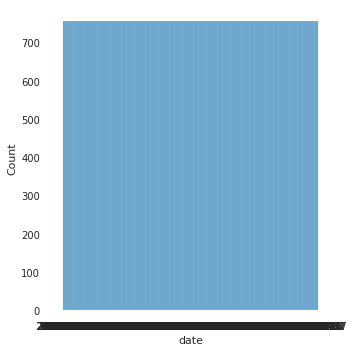

In [44]:
# Gráfica de la distribución de la variable date
pd.to_datetime(df_['date'])
sns.displot(df_['date'])

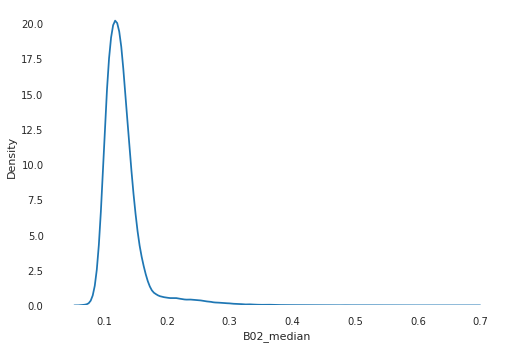

In [40]:
# Gráfica de la distribución de la variable B02_median
sns.kdeplot(df_['B02_median'])

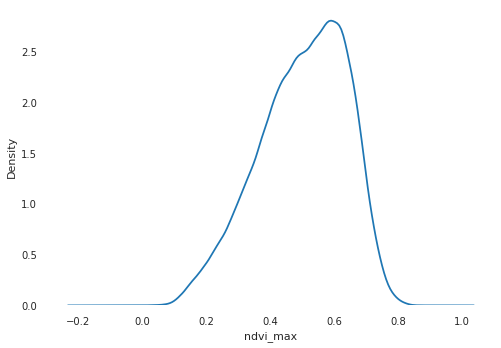

In [42]:
# Gráfica de la distribución de la variable ndvi_max
sns.kdeplot(df_['ndvi_max'])

- osm_id: Esta es una variable identificadora por lo que su distribución no tiene interés.
- date: Se cuenta con la misma cantidad de casos para todos los valores (fechas) por que es una distribución equiprobable. Ver gráfica de distribución más abajo.
- B02_median: La distribución parece ser de tipo normal con valores extremos a la derecha.  
- ndvi_max: La distribución parece ser de tipo normal.

**Distribucion Condicionada**: ¿Cómo es la distribución de una variable (cualquiera que haya elegido) condicionada a la variable temporal por ejemplo? ¿Tiene sentido utilizar la dependencia temporal cuando estamos intentando completar valores faltantes?

- osm_id: 
- date: 
- B02_median:   
- ndvi_max: 


En caso de calcular estadísticos, explicar por qué lo hicieron y que buscaban obtener al calcularlos. Utilizar los gráficos apropiados para mostrar el análisis realizado.  
Además:


-  ¿Existe _correlacion_ entre variables? ¿Entre cuales es mas "intensa"? -> Considere utilizar  [__pandas-profiling__](https://github.com/ydataai/pandas-profiling)
-  Analizar la dispersión de las bandas (para un estadistico, por ejemplo la media) a lo largo del tiempo. ¿La dispersión es la misma en todos los casos? ¿O existen bandas que "se dispersan" mas?

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

##Series temporales
Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como **series de tiempo**. Elija alguno de los espacios verdes mas conocidos (Parque Sarmiento por ejemplo) y responda: 

- ¿Cual es el período de tiempo bajo análisis?
- Elija una banda y un indice (B02 y NDVI, por ejemplo) ambos parecen seguir alguna estacionalidad? Es decir, sus valores parecen "repetirse" cada cierto periodo? (Para este analisis considere utilizar la mediana de todas las mediciones {}_median).
- Ahora extienda el analisis a todas las variables, son estacionales? Todas tienen el mismo tipo de estacionalidad? __Nota__: En este punto y etapa no se espera un criterio estricto de estacionalidad sino mostrar que bajo algun criterio (por ejemplo boxplots "similares" por temporada, etc) parecen serlo.
- Seleccione un índice y grafique un boxplot para cada año. ¿Se mantiene inalterada en el tiempo la distribución? Que pasa si ese boxplot lo separa por estación (invierno,verano,otoño, primavera) y año son parecidas entre ellas en algun caso? Como se comportan año a año?
- Tiene sentido calcular outliers para todo el tiempo de la serie o deberia segmentarse? Es decir, un outlier en otoño es lo mismo que en primavera o verano?
- Sobre datos faltantes, existe algun intervalo temporal en el cual esto parezca ser mas recurrente (observe [ab-initio-data-build](../data/ab-initio-dataset-build.md) # Imagenes CBA) ? 

    __Punto Extra__: replique la imágen _cantidad de imágenes por fecha y nubosidad_, se le ocurre alguna forma alternativa de representarlo?
- Sobre los outliers, elija alguna banda o indice y compute los outliers (bajo algun criterio que le parezca razonable), ahora contraste los mismos (o el rango de los mismos) con la representacion de los rasters ( descargables desde: [parches rbg/cloud-mask](https://drive.google.com/file/d/1VJnFvc9waDWPzm0i6UitKwlOSaQVwn_j/view?usp=sharing) ), su eleccion de outliers parece sostenerse? O esta desechando datos que podrian servir?
- __Punto Extra__: Explique el indice NDVI, y su aplicabilidad para observar la evolución de cultivos. ¿Esto nos serviria para monitorear plazas y parques?
- __Punto Extra__: Se le ocurre alguna forma de normalizar los datos para hacernos independientes de los años (pero si mantener la estacionalidad)? 
- __Punto Extra__: El tipo de sensor que estamos considerando esta afectado fuertemente por las condiciones luminicas, puede encontrar algún par de {imagenes, indices} que parezcan representar esta situación? Para ello deberia seleccionar imagenes cercanas temporalmente (misma semana o mes, sin nubes) y obtener sus indices. Podria concluir algo a partir de eso? O le hacen falta mas datos? (Respuesta preliminar: la informacion brindada parece ser insuficiente) 
- ¿Dado un indice, es capaz de encontrar algun rango temporal en el cual parezca romperse la estacionalidad? (Esto lo podria intentar contrastar con las imagenes en rgb para ello le recomendamos que elija un espacio verde extenso)
- Le parece que existen espacios verdes que no sean susceptibles de ser monitoreados via las bandas o indices? 

    __Punto Extra__: Podria generar condiciones o criterios (tamaño, reflectancia en alguna banda, etc) que nos indiquen si un dado espacio es monitoreable ( o no) via imágenes satelitales?

##Conclusiones
Se considerará como positivo la capacidad de generar conclusiones o analisis que permitan construir nuevo conocimiento en base a los datos provistos.
Respecto a las conclusiones, se espera que a partir de los puntos [3] y [4] hayan podido conocer el dataset y tener una idea (linea de acción) para mitigar o atacar temas tales como:
- Outliers?
- Faltantes de datos?
- Todas las variables son relevantes?
- etc

No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes..